Dataset yang digunakan: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

In [1]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/proyek machine learning/proyek text classification(LSTM) - dicoding/ecommerceDataset.csv',
                 header=None)
data.columns = ['category', 'product_description']
data.head()

,category,product_description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             50425 non-null  object
 1   product_description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [3]:
data.duplicated().sum()

22622

In [4]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True)
data.drop(columns='index', inplace=True)
data['product_description'] = data['product_description'].astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27803 entries, 0 to 27802
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             27803 non-null  object
 1   product_description  27803 non-null  object
dtypes: object(2)
memory usage: 434.5+ KB


In [5]:
# lower

def lower_text(text):
  text = text.lower()
  return text
data['lower'] = [lower_text(i) for i in data['product_description']]

In [6]:
# menghapus tanda baca
import nltk
# nltk.download('stopwords')

regexp_token = nltk.RegexpTokenizer(r'\w+')
data['token'] = data['lower'].apply(regexp_token.tokenize)

In [7]:
# stop words

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def stopwords(text):
  text = ' '.join([w for w in text if w not in stop_words])
  return text
data['no_sw'] = data['token'].apply(stopwords)
data

,category,product_description,lower,token,no_sw
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design framed wall hanging motivat...,"[paper, plane, design, framed, wall, hanging, ...",paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","saf 'floral' framed painting (wood, 30 inch x ...","[saf, floral, framed, painting, wood, 30, inch...",saf floral framed painting wood 30 inch x 10 i...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,saf 'uv textured modern art print framed' pain...,"[saf, uv, textured, modern, art, print, framed...",saf uv textured modern art print framed painti...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","saf flower print framed painting (synthetic, 1...","[saf, flower, print, framed, painting, synthet...",saf flower print framed painting synthetic 13 ...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,incredible gifts india wooden happy birthday u...,"[incredible, gifts, india, wooden, happy, birt...",incredible gifts india wooden happy birthday u...
...,...,...,...,...,...
27798,Electronics,Micromax Bharat 5 Plus Zero impact on visual d...,micromax bharat 5 plus zero impact on visual d...,"[micromax, bharat, 5, plus, zero, impact, on, ...",micromax bharat 5 plus zero impact visual disp...
27799,Electronics,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,microsoft lumia 550 8gb 4g black microsoft lum...,"[microsoft, lumia, 550, 8gb, 4g, black, micros...",microsoft lumia 550 8gb 4g black microsoft lum...
27800,Electronics,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...","microsoft lumia 535 (black, 8gb) colour:black ...","[microsoft, lumia, 535, black, 8gb, colour, bl...",microsoft lumia 535 black 8gb colour black pro...
27801,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,karbonn titanium wind w4 (white) karbonn titan...,"[karbonn, titanium, wind, w4, white, karbonn, ...",karbonn titanium wind w4 white karbonn titaniu...


In [8]:
# one hot encoding

category = pd.get_dummies(data.category)
df = pd.concat([data['no_sw'], category], axis=1)
df

,no_sw,Books,Clothing & Accessories,Electronics,Household
0,paper plane design framed wall hanging motivat...,0,0,0,1
1,saf floral framed painting wood 30 inch x 10 i...,0,0,0,1
2,saf uv textured modern art print framed painti...,0,0,0,1
3,saf flower print framed painting synthetic 13 ...,0,0,0,1
4,incredible gifts india wooden happy birthday u...,0,0,0,1
...,...,...,...,...,...
27798,micromax bharat 5 plus zero impact visual disp...,0,0,1,0
27799,microsoft lumia 550 8gb 4g black microsoft lum...,0,0,1,0
27800,microsoft lumia 535 black 8gb colour black pro...,0,0,1,0
27801,karbonn titanium wind w4 white karbonn titaniu...,0,0,1,0


In [9]:
len(df.loc[df['no_sw'].str.len().idxmax(), 'no_sw'])

34816

In [10]:
description = df['no_sw'].values
label = df[['Books', 'Clothing & Accessories', 'Electronics', 'Household']].values

In [11]:
# split data

from sklearn.model_selection import train_test_split
description_train, description_test, label_train, label_test = train_test_split(description, label, test_size=0.2)

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(description_train)

sequence_train = tokenizer.texts_to_sequences(description_train)
sequence_test = tokenizer.texts_to_sequences(description_test)

padded_train = pad_sequences(sequence_train,
                             padding='post',
                             maxlen=5000,
                             truncating='post')
padded_test = pad_sequences(sequence_test,
                             padding='post',
                             maxlen=5000,
                             truncating='post')

In [13]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>=0.95):
      print("\nAkurasi telah mencapai >=95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [15]:
history = model.fit(padded_train, label_train, epochs=20,
                    validation_data=(padded_test, label_test),
                    verbose=1,
                    callbacks=[callbacks])

Epoch 1/20
696/696 [==============================] - 275s 375ms/step - loss: 0.4965 - accuracy: 0.8165 - val_loss: 0.2528 - val_accuracy: 0.9257
Epoch 2/20
696/696 [==============================] - 219s 314ms/step - loss: 0.1739 - accuracy: 0.9527 - val_loss: 0.2160 - val_accuracy: 0.9414
Epoch 3/20
696/696 [==============================] - 204s 293ms/step - loss: 0.1312 - accuracy: 0.9644 - val_loss: 0.2102 - val_accuracy: 0.9410
Epoch 4/20
696/696 [==============================] - 200s 288ms/step - loss: 0.1077 - accuracy: 0.9718 - val_loss: 0.2160 - val_accuracy: 0.9421
Epoch 5/20
696/696 [==============================] - 200s 287ms/step - loss: 0.0829 - accuracy: 0.9790 - val_loss: 0.2277 - val_accuracy: 0.9455
Epoch 6/20
696/696 [==============================] - 199s 286ms/step - loss: 0.0700 - accuracy: 0.9808 - val_loss: 0.2532 - val_accuracy: 0.9399
Epoch 7/20
696/696 [==============================] - 197s 283ms/step - loss: 0.0592 - accuracy: 0.9841 - val_loss: 0.2749 -

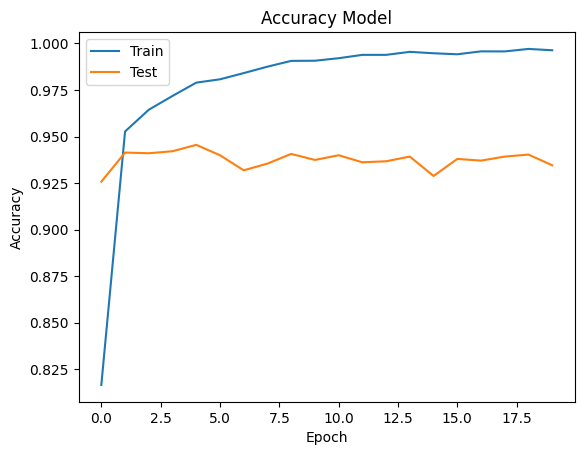

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

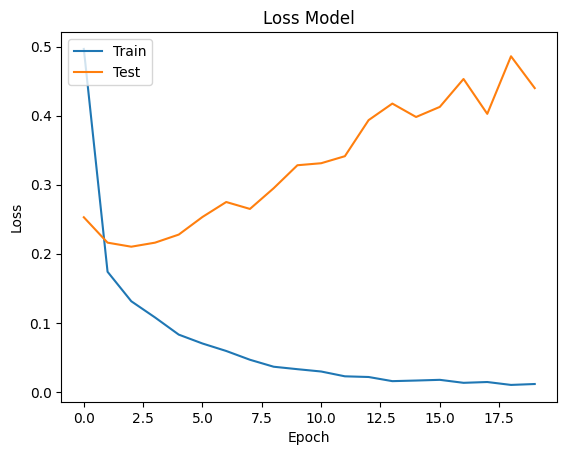

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()